Buta Huruf di Indonesoa

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn')

<ipython-input-5-857796914837>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [6]:
pers_buta_huruf = pd.read_excel('/content/drive/MyDrive/buta huruf/data/buta_labor/buta_huruf_gender.xlsx')
pers_buta_huruf.head()

,Provinsi,Laki-laki + Perempuan,Unnamed: 2,Unnamed: 3
0,NaN,2014,2015.00,2016.00
1,ACEH,2.28,2.09,2.26
2,SUMATERA UTARA,1.31,1.18,1.12
3,SUMATERA BARAT,1.47,1.29,1.19
4,RIAU,1.16,1.06,0.93


In [7]:
pers_buta_huruf.loc[0, "Provinsi"] = "provinsi"
pers_buta_huruf.columns = pers_buta_huruf.iloc[0, :]
pers_buta_huruf.drop(0, axis=0, inplace=True)
pers_buta_huruf.head()

,provinsi,2014,2015.0,2016.0
1,ACEH,2.28,2.09,2.26
2,SUMATERA UTARA,1.31,1.18,1.12
3,SUMATERA BARAT,1.47,1.29,1.19
4,RIAU,1.16,1.06,0.93
5,JAMBI,1.99,1.92,1.99


In [8]:
pers_buta_huruf_melted = pd.melt(pers_buta_huruf, id_vars="provinsi")
pers_buta_huruf_melted

,provinsi,0,value
0,ACEH,2014,2.28
1,SUMATERA UTARA,2014,1.31
2,SUMATERA BARAT,2014,1.47
3,RIAU,2014,1.16
4,JAMBI,2014,1.99
...,...,...,...
100,MALUKU,2016.0,1.06
101,MALUKU UTARA,2016.0,1.33
102,PAPUA BARAT,2016.0,2.95
103,PAPUA,2016.0,28.98


In [9]:
pers_buta_huruf_melted.columns = ["provinsi", "tahun", "persentase"]
pers_buta_huruf_melted["tahun"] = (
    pd.to_datetime(pers_buta_huruf_melted["tahun"].astype(int), format="%Y")
    + pd.offsets.YearEnd()
)
pers_buta_huruf_melted

,provinsi,tahun,persentase
0,ACEH,2014-12-31,2.28
1,SUMATERA UTARA,2014-12-31,1.31
2,SUMATERA BARAT,2014-12-31,1.47
3,RIAU,2014-12-31,1.16
4,JAMBI,2014-12-31,1.99
...,...,...,...
100,MALUKU,2016-12-31,1.06
101,MALUKU UTARA,2016-12-31,1.33
102,PAPUA BARAT,2016-12-31,2.95
103,PAPUA,2016-12-31,28.98


In [10]:
pers_buta_huruf.set_index("provinsi", inplace=True)
pers_buta_huruf.columns = (
    pd.to_datetime(pers_buta_huruf.columns.astype(int).astype(str))
    + pd.offsets.YearEnd()
)
pers_buta_huruf.head()

,2014-12-31,2015-12-31,2016-12-31
provinsi,,,
ACEH,2.28,2.09,2.26
SUMATERA UTARA,1.31,1.18,1.12
SUMATERA BARAT,1.47,1.29,1.19
RIAU,1.16,1.06,0.93
JAMBI,1.99,1.92,1.99


In [11]:
pers_buta_huruf = pers_buta_huruf.T.reset_index()
pers_buta_huruf.head()

provinsi,0,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,...,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA,INDONESIA
0,2014-12-31,2.28,1.31,1.47,1.16,1.99,1.71,2.27,3.12,2.16,...,2.76,7.73,5.24,2.08,6.83,1.12,1.54,3.37,27.35,4.39
1,2015-12-31,2.09,1.18,1.29,1.06,1.92,1.58,2.1,2.98,2.11,...,2.4,7.67,5.09,1.62,6.25,1.01,1.39,2.83,26.81,4.27
2,2016-12-31,2.26,1.12,1.19,0.93,1.99,1.54,2.25,3.22,2.34,...,2.49,8.48,5.75,1.56,7.25,1.06,1.33,2.95,28.98,4.62


In [12]:
pers_buta_huruf.rename(columns={0: "tahun"}, inplace=True)
pers_buta_huruf.set_index("tahun", inplace=True)
pers_buta_huruf.sort_index(inplace=True)
pers_buta_huruf.head()

provinsi,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,KEP. RIAU,...,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA,INDONESIA
tahun,,,,,,,,,,,,,,,,,,,,,
2014-12-31,2.28,1.31,1.47,1.16,1.99,1.71,2.27,3.12,2.16,1.23,...,2.76,7.73,5.24,2.08,6.83,1.12,1.54,3.37,27.35,4.39
2015-12-31,2.09,1.18,1.29,1.06,1.92,1.58,2.1,2.98,2.11,1.08,...,2.4,7.67,5.09,1.62,6.25,1.01,1.39,2.83,26.81,4.27
2016-12-31,2.26,1.12,1.19,0.93,1.99,1.54,2.25,3.22,2.34,1.16,...,2.49,8.48,5.75,1.56,7.25,1.06,1.33,2.95,28.98,4.62


In [13]:
pers_buta_huruf_melted.to_csv("/content/drive/MyDrive/buta huruf/data/buta_labor_cleaned/buta_huruf_gender.csv", index=False)


In [14]:
for i, row in pers_buta_huruf_melted.iterrows():
    print(row['tahun'])

2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2014-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00
2015-12-31 00:00:00


In [15]:
pers_buta_huruf.columns

Index(['ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI',
       'SUMATERA SELATAN', 'BENGKULU', 'LAMPUNG', 'KEP. BANGKA BELITUNG',
       'KEP. RIAU', 'DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH',
       'DI YOGYAKARTA', 'JAWA TIMUR', 'BANTEN', 'BALI', 'NUSA TENGGARA BARAT',
       'NUSA TENGGARA TIMUR', 'KALIMANTAN BARAT', 'KALIMANTAN TENGAH',
       'KALIMANTAN SELATAN', 'KALIMANTAN TIMUR', 'KALIMANTAN UTARA',
       'SULAWESI UTARA', 'SULAWESI TENGAH', 'SULAWESI SELATAN',
       'SULAWESI TENGGARA', 'GORONTALO', 'SULAWESI BARAT', 'MALUKU',
       'MALUKU UTARA', 'PAPUA BARAT', 'PAPUA', 'INDONESIA'],
      dtype='object', name='provinsi')

In [16]:
pers_buta_huruf.index[:2].to_list() + ["2020-03-02"]


[Timestamp('2014-12-31 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 '2020-03-02']

In [17]:
sorted(pers_buta_huruf_melted.loc[pers_buta_huruf_melted["provinsi"] == "INDONESIA", "tahun"].dt.strftime('%Y-%b'))


['2014-Dec', '2015-Dec', '2016-Dec']

<ipython-input-19-42e1b4f8f74e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(


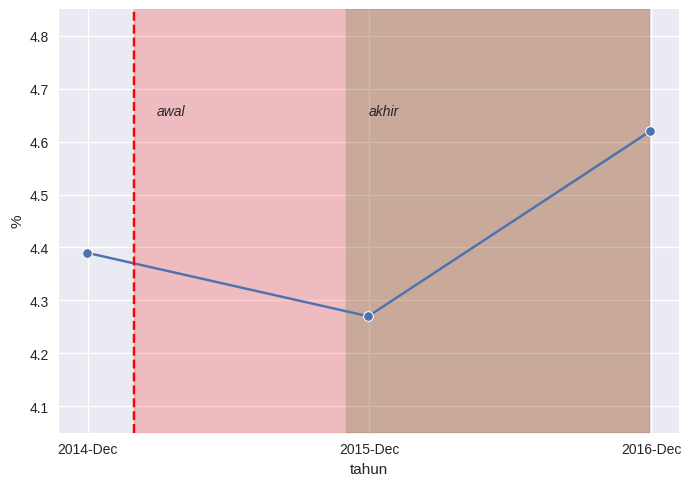

In [19]:
import matplotlib.dates as mdates
pers_buta_huruf_indo = pers_buta_huruf_melted[
    pers_buta_huruf_melted["provinsi"] == "INDONESIA"
]
ax = sns.lineplot(
    x="tahun",
    y="persentase",
    data=pers_buta_huruf_indo,
    marker="o",
)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_ticklabels(
    [""]
    + sorted(
        pers_buta_huruf_indo.tahun.dt.strftime("%Y-%b")
    )
)
# create a seperator before and after 2015
plt.axvline(x=pd.to_datetime("2015-03-02"), color="red", linestyle="--")
fill_thresholds_min, fill_thresholds_max = (
    np.min(ax.get_yticks()) - 0.2,
    np.max(ax.get_yticks()) + 0.2,
)
ax.fill_between(
    ["2016-12-31", "2015-12-02"],
    fill_thresholds_min,
    fill_thresholds_max,
    color="green",
    alpha=0.2,
)
ax.fill_between(
    ["2015-03-02", "2016-12-31"],
    fill_thresholds_min,
    fill_thresholds_max,
    color="red",
    alpha=0.2,
)
ax.text(pd.to_datetime("2015-04"), fill_thresholds_max - 0.2, "awal", style="italic")
ax.text(
    pd.to_datetime("2016"), fill_thresholds_max - 0.2, "akhir", style="italic"
)
plt.ylim(fill_thresholds_min, fill_thresholds_max)
plt.ylabel("%")
plt.show()

In [27]:
pers_buta_huruf_jenis = pd.read_excel(
    "/content/drive/MyDrive/buta huruf/data/buta_labor/buta_huruf_jenis.xlsx"
)
pers_buta_huruf_jenis.head()

,Jenis Kelamin + Jumlah,Penduduk Berumur 10 Tahun ke Atas yang Buta Huruf (Persen),Unnamed: 2,Unnamed: 3
0,NaN,2014,2015.00,2016.00
1,Laki-Laki,2.92,2.61,2.83
2,Perempuan,5.86,5.95,6.41
3,Laki-Laki + Perempuan,4.39,4.27,4.62
4,NaN,NaN,NaN,NaN


In [28]:
pers_buta_huruf_jenis.loc[0, "Jenis Kelamin + Jumlah"] = "gender"
pers_buta_huruf_jenis.columns = pers_buta_huruf_jenis.iloc[0, :]
pers_buta_huruf_jenis.drop(0, axis=0, inplace=True)
pers_buta_huruf_jenis.drop(
    pers_buta_huruf_jenis.iloc[3:, :].index, axis=0, inplace=True
)
pers_buta_huruf_jenis.head()

,gender,2014,2015.0,2016.0
1,Laki-Laki,2.92,2.61,2.83
2,Perempuan,5.86,5.95,6.41
3,Laki-Laki + Perempuan,4.39,4.27,4.62


In [29]:
pers_buta_huruf_jenis_melted = pd.melt(pers_buta_huruf_jenis, id_vars="gender")
pers_buta_huruf_jenis_melted

,gender,0,value
0,Laki-Laki,2014,2.92
1,Perempuan,2014,5.86
2,Laki-Laki + Perempuan,2014,4.39
3,Laki-Laki,2015.0,2.61
4,Perempuan,2015.0,5.95
5,Laki-Laki + Perempuan,2015.0,4.27
6,Laki-Laki,2016.0,2.83
7,Perempuan,2016.0,6.41
8,Laki-Laki + Perempuan,2016.0,4.62


In [30]:
pers_buta_huruf_jenis_melted.columns = ["gender", "tahun", "persentase"]
pers_buta_huruf_jenis_melted["tahun"] = (
    pd.to_datetime(pers_buta_huruf_jenis_melted["tahun"].astype(int), format="%Y")
    + pd.offsets.YearEnd()
)
pers_buta_huruf_jenis_melted

,gender,tahun,persentase
0,Laki-Laki,2014-12-31,2.92
1,Perempuan,2014-12-31,5.86
2,Laki-Laki + Perempuan,2014-12-31,4.39
3,Laki-Laki,2015-12-31,2.61
4,Perempuan,2015-12-31,5.95
5,Laki-Laki + Perempuan,2015-12-31,4.27
6,Laki-Laki,2016-12-31,2.83
7,Perempuan,2016-12-31,6.41
8,Laki-Laki + Perempuan,2016-12-31,4.62


In [31]:
pers_buta_huruf_jenis.set_index("gender", inplace=True)
pers_buta_huruf_jenis.columns = pd.to_datetime(
    pers_buta_huruf_jenis.columns.astype(int).astype(str)
)
pers_buta_huruf_jenis.head()

,2014-01-01,2015-01-01,2016-01-01
gender,,,
Laki-Laki,2.92,2.61,2.83
Perempuan,5.86,5.95,6.41
Laki-Laki + Perempuan,4.39,4.27,4.62


In [32]:
pers_buta_huruf_jenis = pers_buta_huruf_jenis.T.reset_index()
pers_buta_huruf_jenis.rename(columns={0: "tahun"}, inplace=True)
pers_buta_huruf_jenis.set_index("tahun", inplace=True)
pers_buta_huruf_jenis.sort_index(inplace=True)
pers_buta_huruf_jenis.head()

gender,Laki-Laki,Perempuan,Laki-Laki + Perempuan
tahun,,,
2014-01-01,2.92,5.86,4.39
2015-01-01,2.61,5.95,4.27
2016-01-01,2.83,6.41,4.62


In [33]:
pers_buta_huruf_jenis_melted.to_csv("/content/drive/MyDrive/buta huruf/data/buta_labor_cleaned/pers_buta_huruf_jenis.csv")


<ipython-input-89-ffef41dde1bc>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(


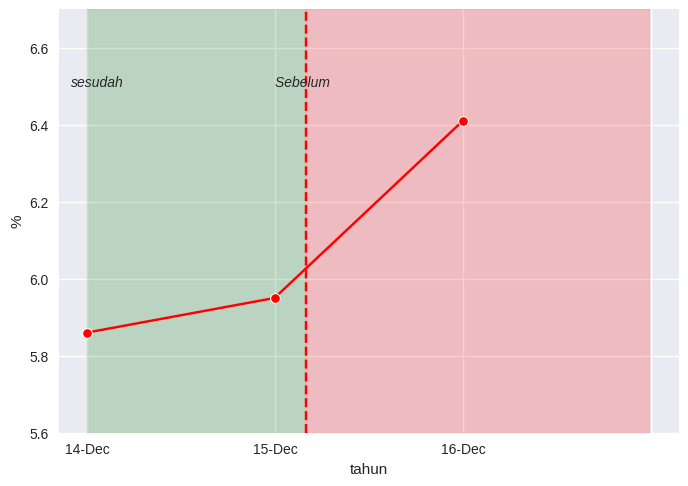

In [89]:
pers_anak_laki = pers_buta_huruf_jenis_melted[pers_buta_huruf_jenis_melted["gender"] == "Laki-laki"]
pers_anak_perempuan = pers_buta_huruf_jenis_melted[pers_buta_huruf_jenis_melted["gender"] == "Perempuan"]
ax = sns.lineplot(
    x="tahun",
    y="persentase",
    data=pers_anak_laki,
    marker="o",
    color="b",
    
)
sns.lineplot(
    x="tahun",
    y="persentase",
    data=pers_anak_perempuan,
    marker="o",
    color="r",
    ax=ax,
)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_ticklabels(
    [""]
    + sorted(
        pers_anak_laki.tahun.dt.strftime("%y-%b")
    )
    + sorted(
        pers_anak_perempuan.tahun.dt.strftime("%y-%b")
    )
)
# create a seperator before and after 2017
plt.axvline(x=pd.to_datetime("2016-03-02"), color="red", linestyle="--")
fill_thresholds_min, fill_thresholds_max = (
    np.min(ax.get_yticks()) - 0.2,
    np.max(ax.get_yticks()) + 0.2,
)
ax.fill_between(
    ["2014-12-31", "2016-03-02"],
    fill_thresholds_min,
    fill_thresholds_max,
    color="green",
    alpha=0.2,
)
ax.fill_between(
    ["2016-03-02", "2017-12-31"],
    fill_thresholds_min,
    fill_thresholds_max,
    color="red",
    alpha=0.2,
)
ax.text(pd.to_datetime("2014-12"), fill_thresholds_max - 0.2, "sesudah", style="italic")
ax.text(
    pd.to_datetime("2016"), fill_thresholds_max - 0.2, "Sebelum ", style="italic"
)
plt.ylim(fill_thresholds_min, fill_thresholds_max)
plt.ylabel("%")
plt.show()

Observations: Anak Buta huruf mengalami penurunan

In [90]:
pers_buta_huruf_provinsi = pd.read_excel(
    "/content/drive/MyDrive/buta huruf/data/buta_labor/buta_huruf_provinsi.xlsx"
)
pers_buta_huruf_provinsi.head()

,provinsi,persentase
0,ACEH,2.26
1,SUMATERA UTARA,1.12
2,SUMATERA BARAT,1.19
3,RIAU,0.93
4,JAMBI,1.99


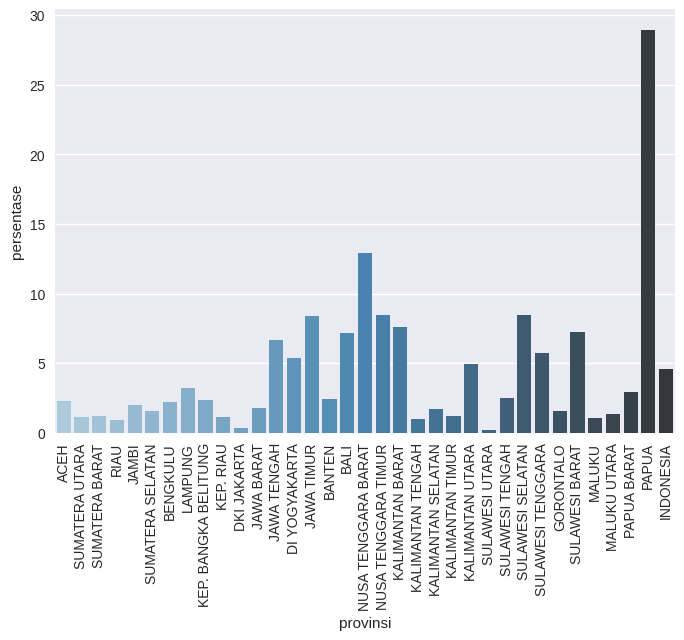

In [96]:
sns.barplot(x="provinsi", y="persentase", data=pers_buta_huruf_provinsi, palette="Blues_d")
plt.xticks(rotation=90)
plt.show()